<a href="https://colab.research.google.com/github/suuuuwimmer/study/blob/master/6-3.%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

차원(특성)이 너무 많으면 과대적합되는데, 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시키기 위해서 **차원 축소**가 필요하다.\
대표적인 차원 축소 알고리즘으로는 **주성분 분석**이 있다. 간단히 PCA라고도 한다.

주성분 분석은 데이터에 분산이 큰 방향을 찾는 것이다.\
이때 원본 데이터의 어떠한 방향을 주성분이라한다.

## PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-06-08 05:42:32--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-06-08 05:42:32--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-06-08 05:42:32--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

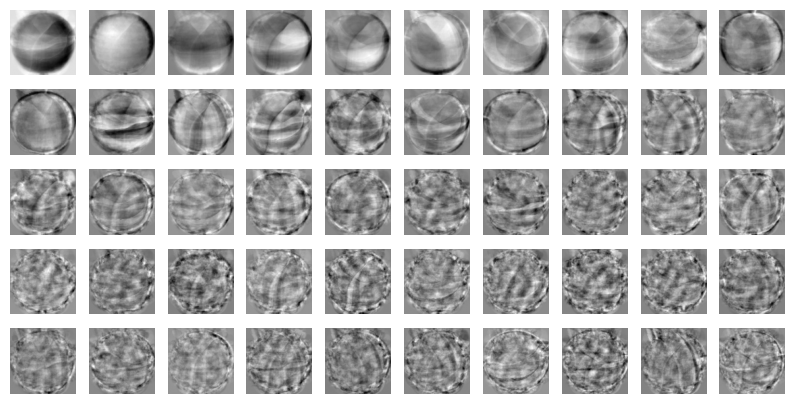

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)

In [ ]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

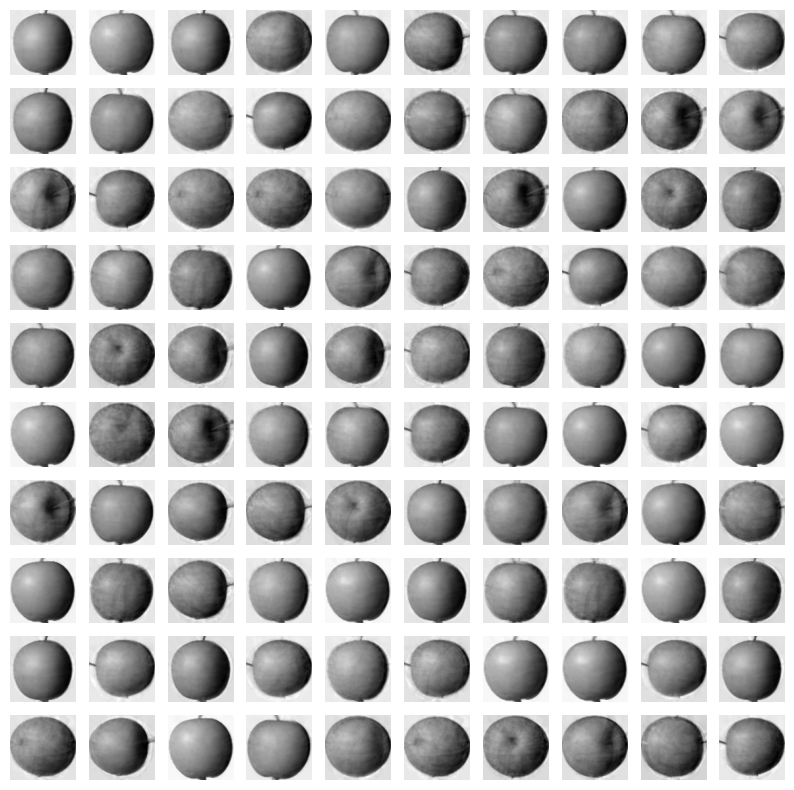

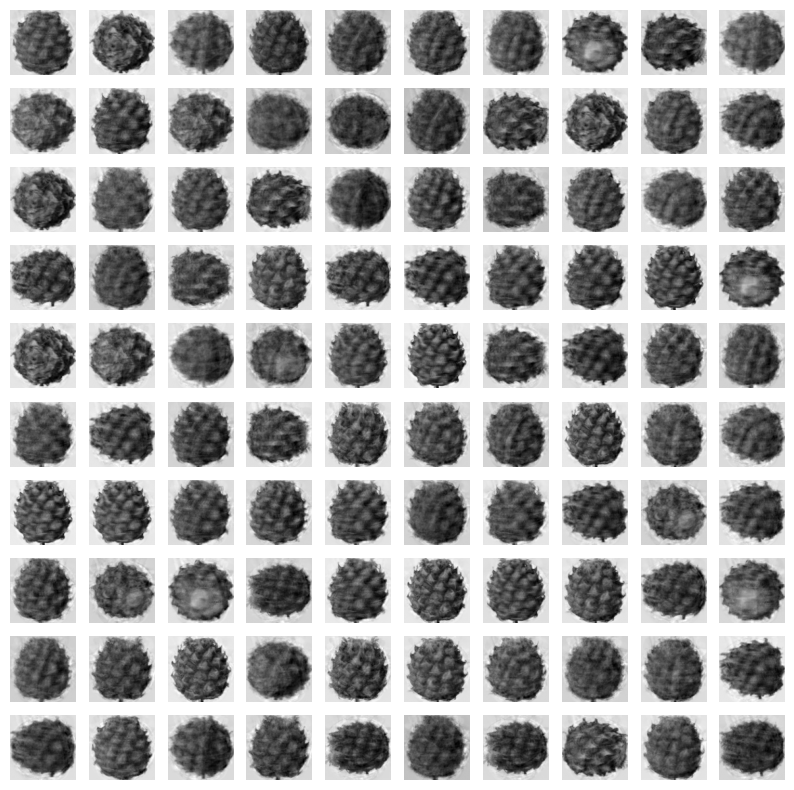

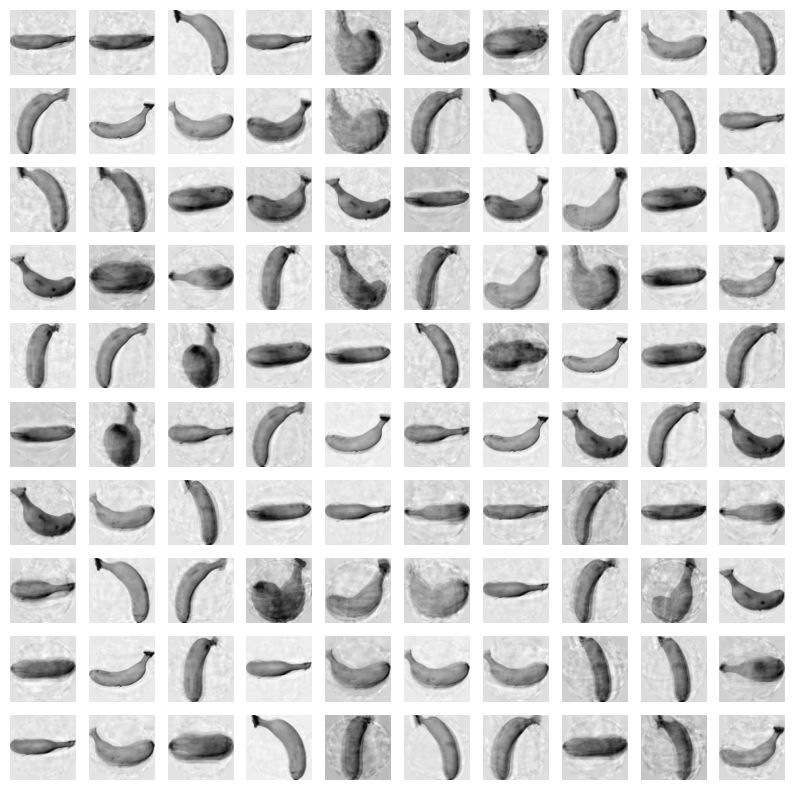

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215434052091788


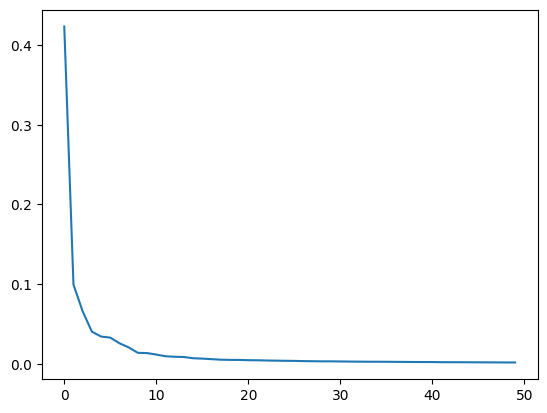

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5631699562072754


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.03074793815612793


분산 비율에 따라 주성분을 고르고 싶다면 주성분의 개수가 아닌 분산 비율(50%)를 0~1 사이의 실수로 입력하면 됨.

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.035564231872558597


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


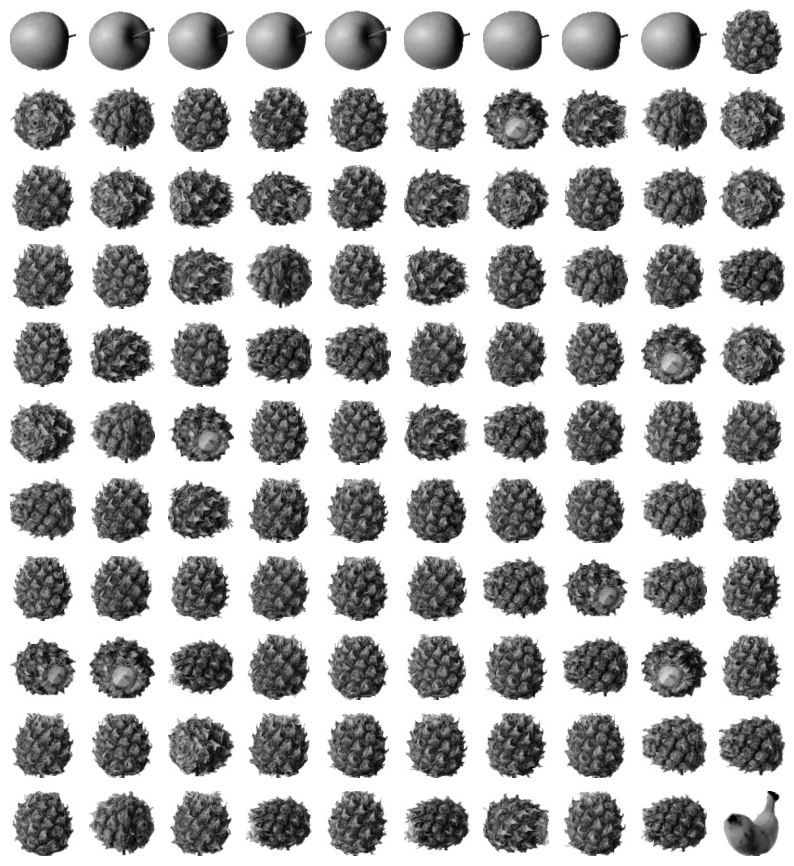

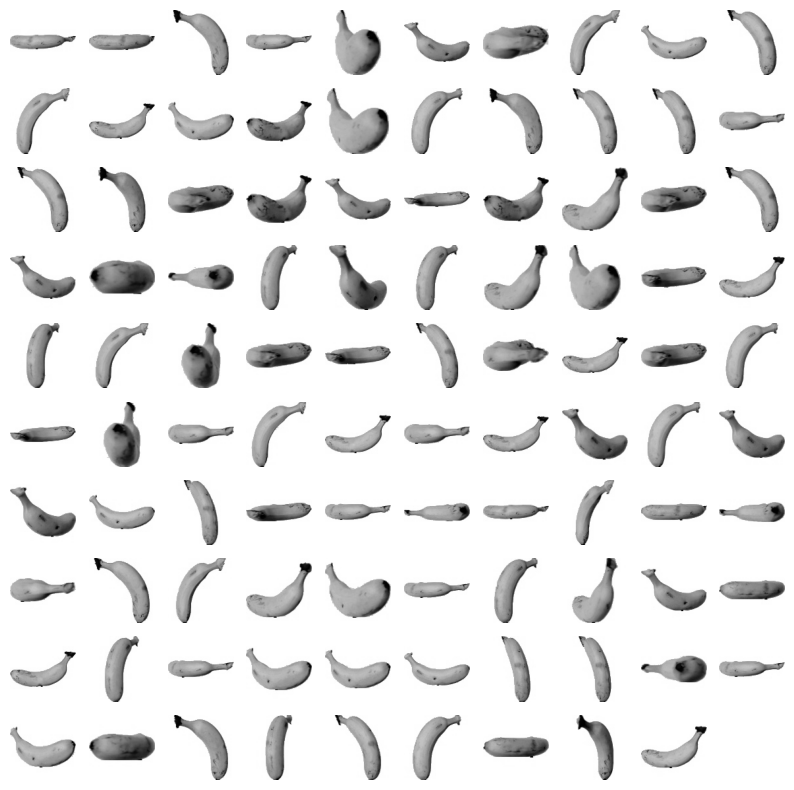

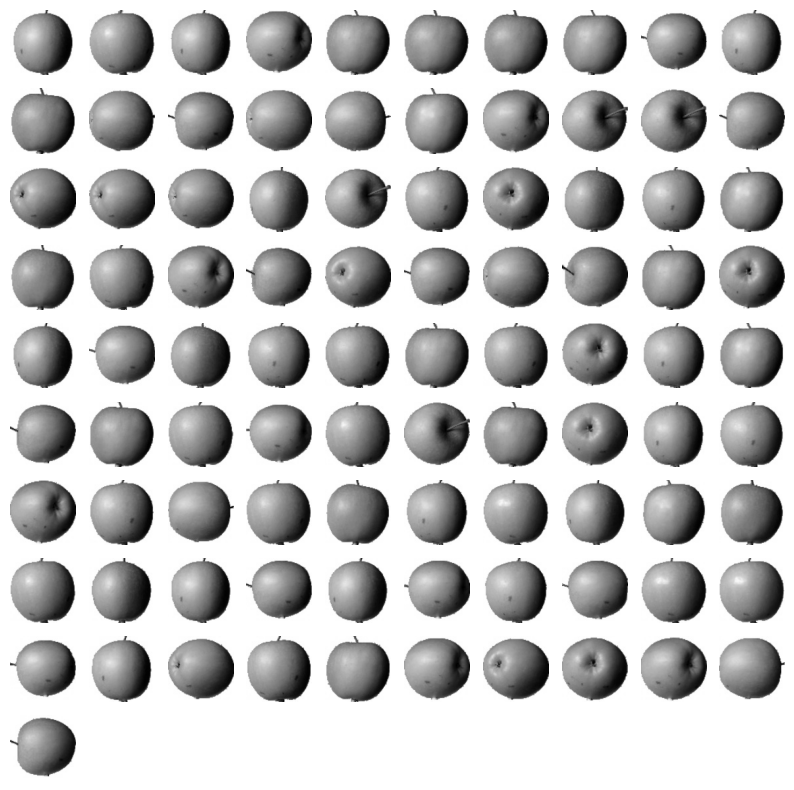

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

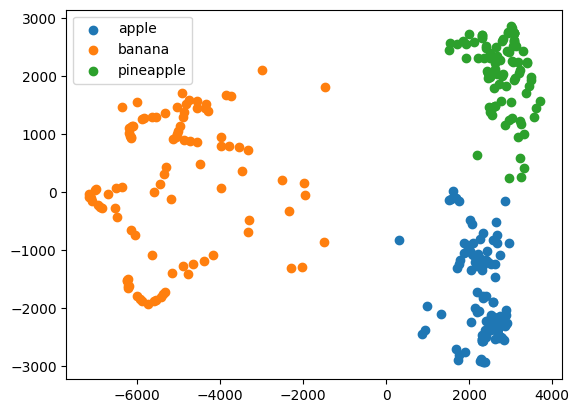

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()